### HW10
#### 111261022

#### Exercise 1
Find the relative shift for response when having maximum MI

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Use np.histogram2d to calculate the mutual information
def mutual_info(a,b,bins=20):
    '''Calculate mutual information between two data arrays

    Parameters
    ==========
     a,b :  Two arrays

    Returns
    =======
     mi :  Mutual information
    '''
    pxy = np.histogram2d(a,b,bins)[0]
    pxy /= np.sum(pxy) # Joint probability
    px = pxy.sum(axis=1) # Marginal probability
    py = pxy.sum(axis=0) # Marginal probability
    return entropy2(px)+entropy2(py)-entropy2(pxy)

In [3]:
# Calculate entropy of a probability distribution in bits,
def entropy2(a):
    '''Entropy of discrete probability distribution `a`, measured in bits

    Parameter
    =========
    a : Array of probabilities
    '''
    b = a[np.where(a>0)]
    return -np.sum(b*np.log2(b))

In [4]:
#Loading data
data = np.load('hw10-data.npz')
s = data['s']  # Stimulus signal
r = data['r']  # Response signal


--- Results ---
Peak Mutual Information: 2.5880 bits
Peak Position (Relative Frame Shift δ): 6


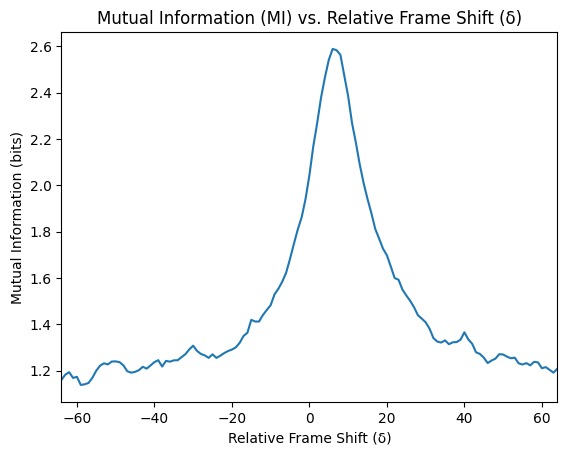

In [5]:
#Shifting the response and get MI
shifts = np.arange(-64, 65)  # Range from -64 to +64 (inclusive)
mi_scores = []

for shift in shifts:
    r_shifted = np.roll(r, shift)
    mi = mutual_info(s,r_shifted,bins=20)
    mi_scores.append(mi)

peak_mi = np.max(mi_scores)
# Find the index of the max value
peak_index = np.argmax(mi_scores)

# Get the corresponding shift value
peak_shift = shifts[peak_index]

print("\n--- Results ---")
print(f"Peak Mutual Information: {peak_mi:.4f} bits")
print(f"Peak Position (Relative Frame Shift δ): {peak_shift}")

plt.plot(shifts, mi_scores)
plt.title('Mutual Information (MI) vs. Relative Frame Shift (δ)')
plt.xlabel('Relative Frame Shift (δ)')
plt.ylabel('Mutual Information (bits)')
plt.xlim(-64, 64)
plt.show()

#### Exercise 2
Calculate the baseline of the MI by randomizing r and s

In [6]:
from numpy.random._examples.cffi.extending import rng

In [7]:
n_iter = 1000
mi_ran1 = []

for _ in range(n_iter):
    rr = rng.permutation(r)
    mi = mutual_info(s, rr, bins=20)
    mi_ran1.append(mi)

mi_base = np.mean(mi_ran1)
print(f"Mutual Information Baseline 1: {mi_base:.4f} bits")

Mutual Information Baseline 1: 0.2648 bits


In [8]:
shifts2 = np.arange(0, 999)  # Range from -64 to +64 (inclusive)
mi_ran2 = []

for shift in shifts2:
    r_shifted = np.roll(r, shift)
    mi = mutual_info(s,r_shifted,bins=20)
    mi_ran2.append(mi)

mi_base2 = np.mean(mi_ran2)
print(f"Mutual Information Baseline 2: {mi_base2:.4f} bits")


Mutual Information Baseline 2: 1.1423 bits


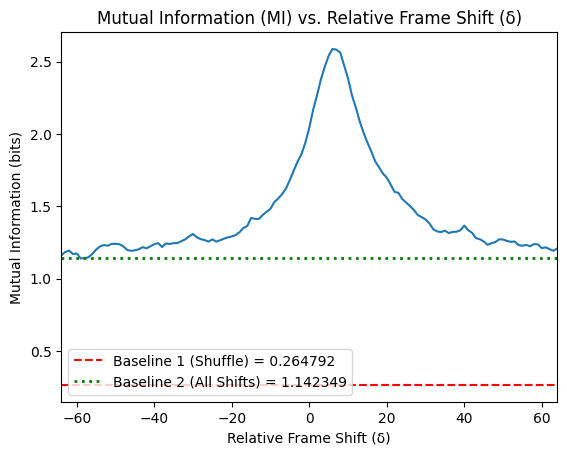

In [10]:
plt.plot(shifts, mi_scores)
plt.title('Mutual Information (MI) vs. Relative Frame Shift (δ)')
plt.xlabel('Relative Frame Shift (δ)')
plt.ylabel('Mutual Information (bits)')
plt.xlim(-64, 64)
plt.axhline(y=mi_base, color='red', linestyle='--',
            label=f'Baseline 1 (Shuffle) = {mi_base:.6f}')

# Plot Baseline 2
plt.axhline(y=mi_base2, color='green', linestyle=':', lw=2,
            label=f'Baseline 2 (All Shifts) = {mi_base2:.6f}')
plt.legend()

plt.show()

As the figure shown, the baseline MI calculate by all possible relative shifts is better for the data.